In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'
url_gca = 'https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats'

In [4]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing = data_passing.drop(columns=['Rk', 'Matches'])
data_passing

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,Att,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-044,2000,22.6,755,1004,...,160,44.4,1,0.9,+0.1,12,37,28,7,72
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-142,1987,22.1,856,1042,...,201,64.7,0,0.2,-0.2,6,50,4,0,53
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-328,2000,20.2,1186,1292,...,174,85.1,0,0.8,-0.8,9,52,5,0,49
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-016,1993,20.3,836,1020,...,197,68.0,1,1.7,-0.7,14,78,13,6,79
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-311,2000,0.5,2,6,...,0,NaN,0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-015,1999,16.3,664,780,...,126,71.4,1,0.4,+0.6,8,62,7,1,58
2860,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-145,1997,15.2,464,558,...,53,67.9,1,1.0,0.0,14,37,14,2,46
2861,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-062,1998,15.3,654,787,...,117,65.8,4,3.6,+0.4,38,40,30,1,73
2862,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-271,1990,11.9,188,325,...,4,75.0,1,1.0,0.0,9,12,0,0,13


In [5]:
data_shooting = pd.read_html(url_shooting, header=1)[0]
data_shooting = data_shooting[data_shooting['Player'] != 'Player']
data_shooting = data_shooting.drop(columns=['Rk', 'Matches'])
data_shooting

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-044,2000,22.6,0,10,...,0.00,20.1,0,0,0,0.6,0.6,0.06,-0.6,-0.6
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-142,1987,22.1,1,14,...,0.25,19.1,0,0,0,1.0,1.0,0.07,0.0,0.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-328,2000,20.2,0,12,...,0.00,18.6,0,0,0,0.6,0.6,0.05,-0.6,-0.6
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-016,1993,20.3,0,19,...,0.00,21.6,0,0,0,1.7,1.7,0.09,-1.7,-1.7
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-311,2000,0.5,0,0,...,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-015,1999,16.3,0,6,...,0.00,16.2,0,0,0,0.4,0.4,0.07,-0.4,-0.4
2860,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-145,1997,15.2,4,33,...,0.29,19.9,0,0,0,2.7,2.7,0.08,+1.3,+1.3
2861,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-062,1998,15.3,4,22,...,0.40,21.0,8,0,0,1.8,1.8,0.08,+2.2,+2.2
2862,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-271,1990,11.9,2,19,...,0.17,9.5,0,1,1,3.2,2.4,0.13,-1.2,-1.4


In [6]:
data_gca = pd.read_html(url_gca, header=1)[0]
data_gca = data_gca[data_gca['Player'] != 'Player']
data_gca = data_gca.drop(columns=['Rk', 'Matches'])
data_gca

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,SCA,SCA90,...,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-044,2000,22.6,26,1.15,...,1,0,4,0.18,4,0,0,0,0,0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-142,1987,22.1,14,0.63,...,0,2,0,0.00,0,0,0,0,0,0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-328,2000,20.2,27,1.34,...,2,2,0,0.00,0,0,0,0,0,0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-016,1993,20.3,32,1.58,...,4,3,2,0.10,1,0,0,0,1,0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-311,2000,0.5,0,0.00,...,0,0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-015,1999,16.3,22,1.35,...,4,2,1,0.06,1,0,0,0,0,0
2860,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-145,1997,15.2,45,2.97,...,4,0,2,0.13,2,0,0,0,0,0
2861,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-062,1998,15.3,67,4.38,...,2,0,8,0.52,8,0,0,0,0,0
2862,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-271,1990,11.9,17,1.56,...,1,0,4,0.37,3,0,0,0,1,0


In [7]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [8]:
data_gca.iloc[:, 7:] = data_gca.iloc[:, 7:].astype(float)
data_passing.iloc[:, 7:] = data_passing.iloc[:, 7:].astype(float)
data_shooting.iloc[:, 7:] = data_shooting.iloc[:, 7:].astype(float)

In [9]:
data_gca = data_gca.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])
data_passing = data_passing.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])

In [10]:
player_data = pd.merge(data_shooting, data_gca, on="Player")
player_data = player_data.drop_duplicates(subset='Player')
player_data = pd.merge(player_data, data_passing, on='Player')
player_data = player_data.drop_duplicates(subset='Player')
player_data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh_x,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-044,2000,22.6,0.0,10.0,...,160.0,44.4,1.0,0.9,0.1,12.0,37.0,28.0,7.0,72.0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-142,1987,22.1,1.0,14.0,...,201.0,64.7,0.0,0.2,-0.2,6.0,50.0,4.0,0.0,53.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-328,2000,20.2,0.0,12.0,...,174.0,85.1,0.0,0.8,-0.8,9.0,52.0,5.0,0.0,49.0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-016,1993,20.3,0.0,19.0,...,197.0,68.0,1.0,1.7,-0.7,14.0,78.0,13.0,6.0,79.0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-311,2000,0.5,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-015,1999,16.3,0.0,6.0,...,126.0,71.4,1.0,0.4,0.6,8.0,62.0,7.0,1.0,58.0
2750,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-145,1997,15.2,4.0,33.0,...,53.0,67.9,1.0,1.0,0.0,14.0,37.0,14.0,2.0,46.0
2751,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-062,1998,15.3,4.0,22.0,...,117.0,65.8,4.0,3.6,0.4,38.0,40.0,30.0,1.0,73.0
2752,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-271,1990,11.9,2.0,19.0,...,4.0,75.0,1.0,1.0,0.0,9.0,12.0,0.0,0.0,13.0


In [11]:
player_data = pd.merge(player_position, player_data, on="Player")
player_data = player_data.drop(columns='S. No.')
player_data = player_data.drop_duplicates(subset='Player')
player_data

,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-142,1987,22.1,1.0,...,201.0,64.7,0.0,0.2,-0.2,6.0,50.0,4.0,0.0,53.0
1,Laurent Abergel,Defensive Midfield,fr FRA,MF,Lorient,fr Ligue 1,29-016,1993,20.3,0.0,...,197.0,68.0,1.0,1.7,-0.7,14.0,78.0,13.0,6.0,79.0
2,Charles Abi,Centre-Forward,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-311,2000,0.5,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Matthis Abline,Centre-Forward,fr FRA,FW,Rennes,fr Ligue 1,18-326,2003,1.1,0.0,...,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,Tammy Abraham,Centre-Forward,eng ENG,FW,Roma,it Serie A,24-138,1997,22.6,11.0,...,31.0,80.6,3.0,2.8,0.2,24.0,19.0,20.0,2.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,Kurt Zouma,Centre-Back,fr FRA,DF,West Ham,eng Premier League,27-113,1994,12.8,1.0,...,101.0,66.3,0.0,0.0,0.0,0.0,9.0,1.0,0.0,19.0
1842,Igor Zubeldia,Defensive Midfield,es ESP,"DF,MF",Real Sociedad,es La Liga,24-324,1997,8.7,0.0,...,119.0,78.2,1.0,0.0,1.0,0.0,28.0,1.0,0.0,14.0
1843,Martín Zubimendi,Defensive Midfield,es ESP,MF,Real Sociedad,es La Liga,23-015,1999,16.3,0.0,...,126.0,71.4,1.0,0.4,0.6,8.0,62.0,7.0,1.0,58.0
1844,Martin Ødegaard,Attacking Midfield,no NOR,MF,Arsenal,eng Premier League,23-062,1998,15.3,4.0,...,117.0,65.8,4.0,3.6,0.4,38.0,40.0,30.0,1.0,73.0


C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

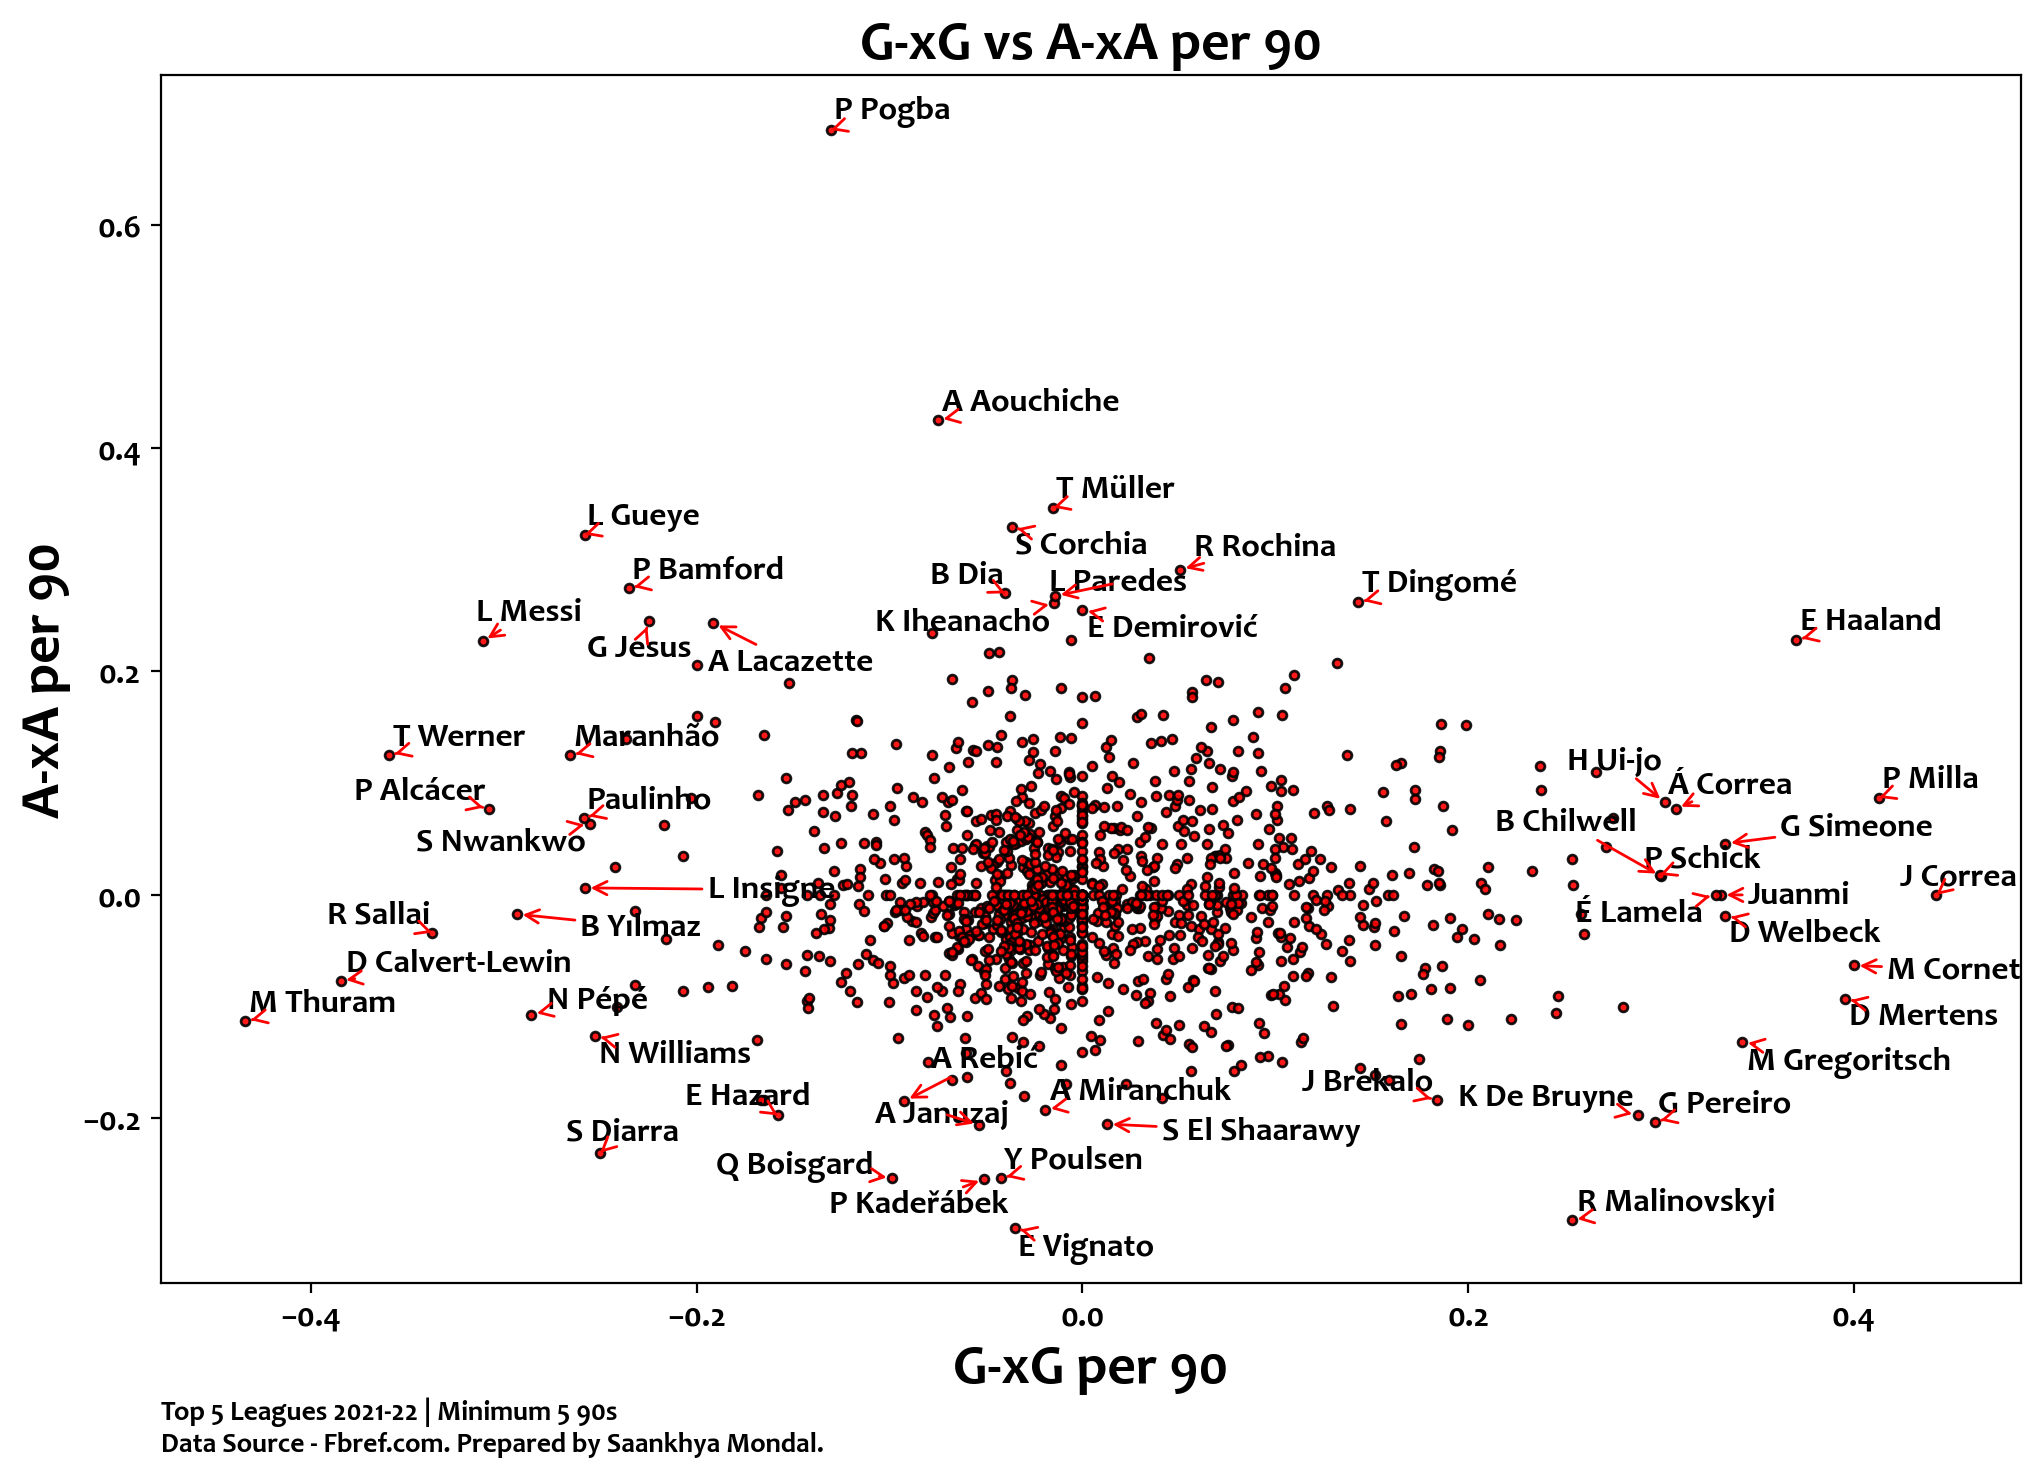

In [12]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['A-xAp90'] = data['A-xA']/data['90s']
data['G-xGp90'] = data['G-xG']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['A-xAp90'].quantile(0.990)
outlier_bottom = data['A-xAp90'].quantile(0.01)
outlier_right = data['G-xGp90'].quantile(0.990)
outlier_left = data['G-xGp90'].quantile(0.01)

par_x = list(data['G-xGp90'].astype(float))
par_y = list(data['A-xAp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('G-xG per 90', fontsize=20)
ax.set_ylabel('A-xA per 90', fontsize=20)
ax.set_title('G-xG vs A-xA per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

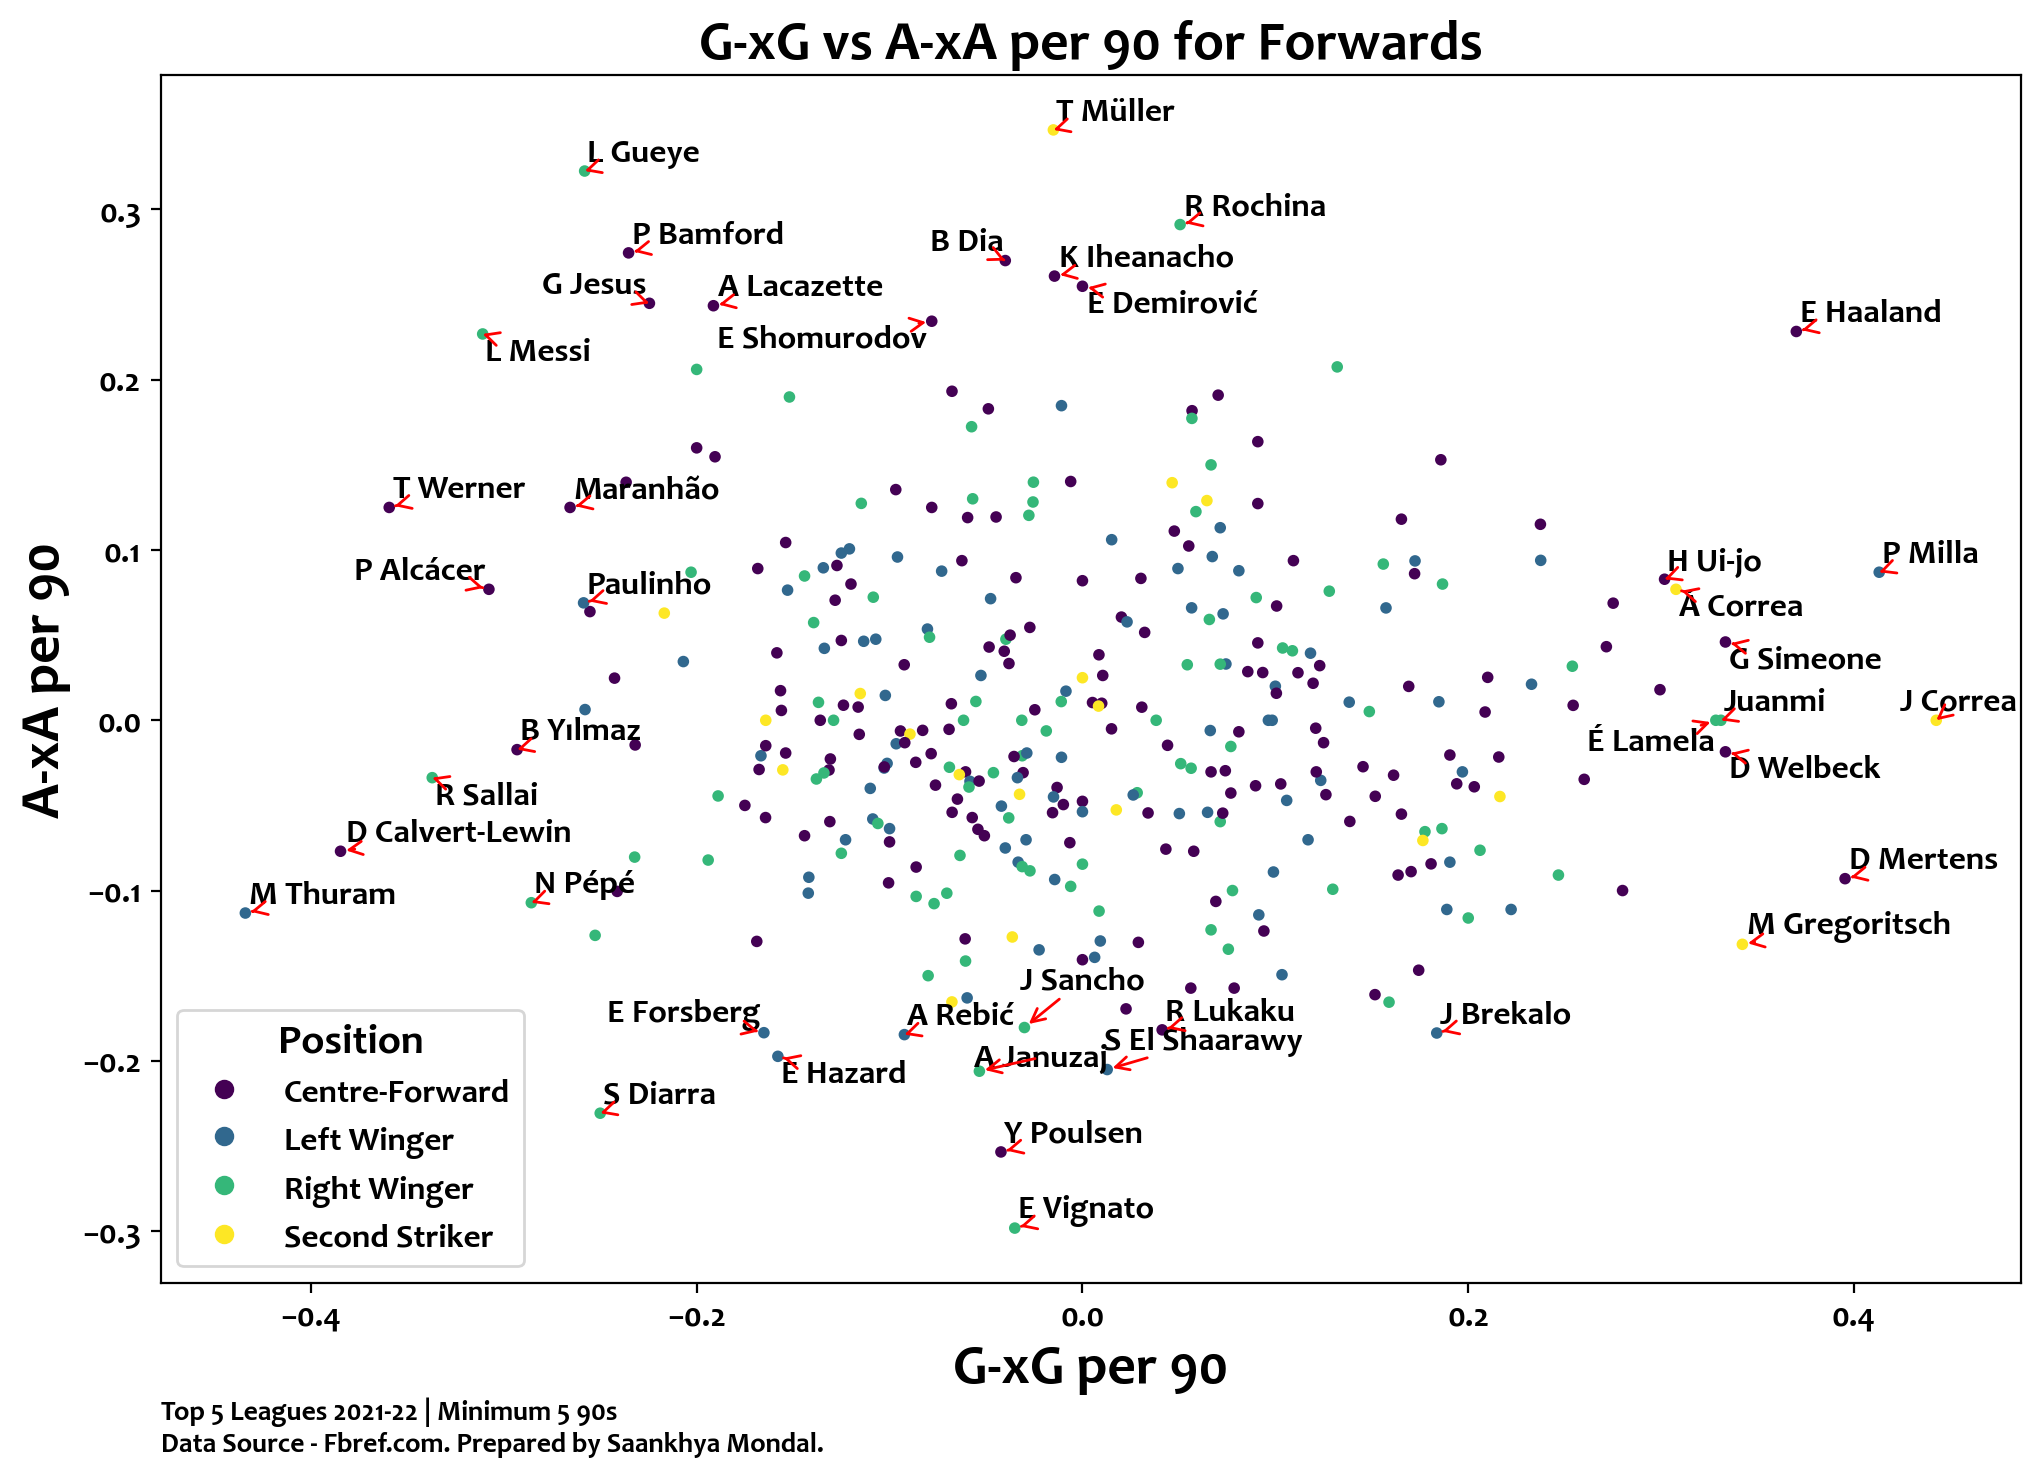

In [13]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Centre-Forward', 'Left Winger', 'Right Winger', 'Second Striker']
data = data[data['Position'].apply(lambda x: x in who)]
data['A-xAp90'] = data['A-xA']/data['90s']
data['G-xGp90'] = data['G-xG']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['A-xAp90'].quantile(0.970)
outlier_bottom = data['A-xAp90'].quantile(0.03)
outlier_right = data['G-xGp90'].quantile(0.970)
outlier_left = data['G-xGp90'].quantile(0.03)

par_x = list(data['G-xGp90'].astype(float))
par_y = list(data['A-xAp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('G-xG per 90', fontsize=20)
ax.set_ylabel('A-xA per 90', fontsize=20)
ax.set_title('G-xG vs A-xA per 90 for Forwards', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

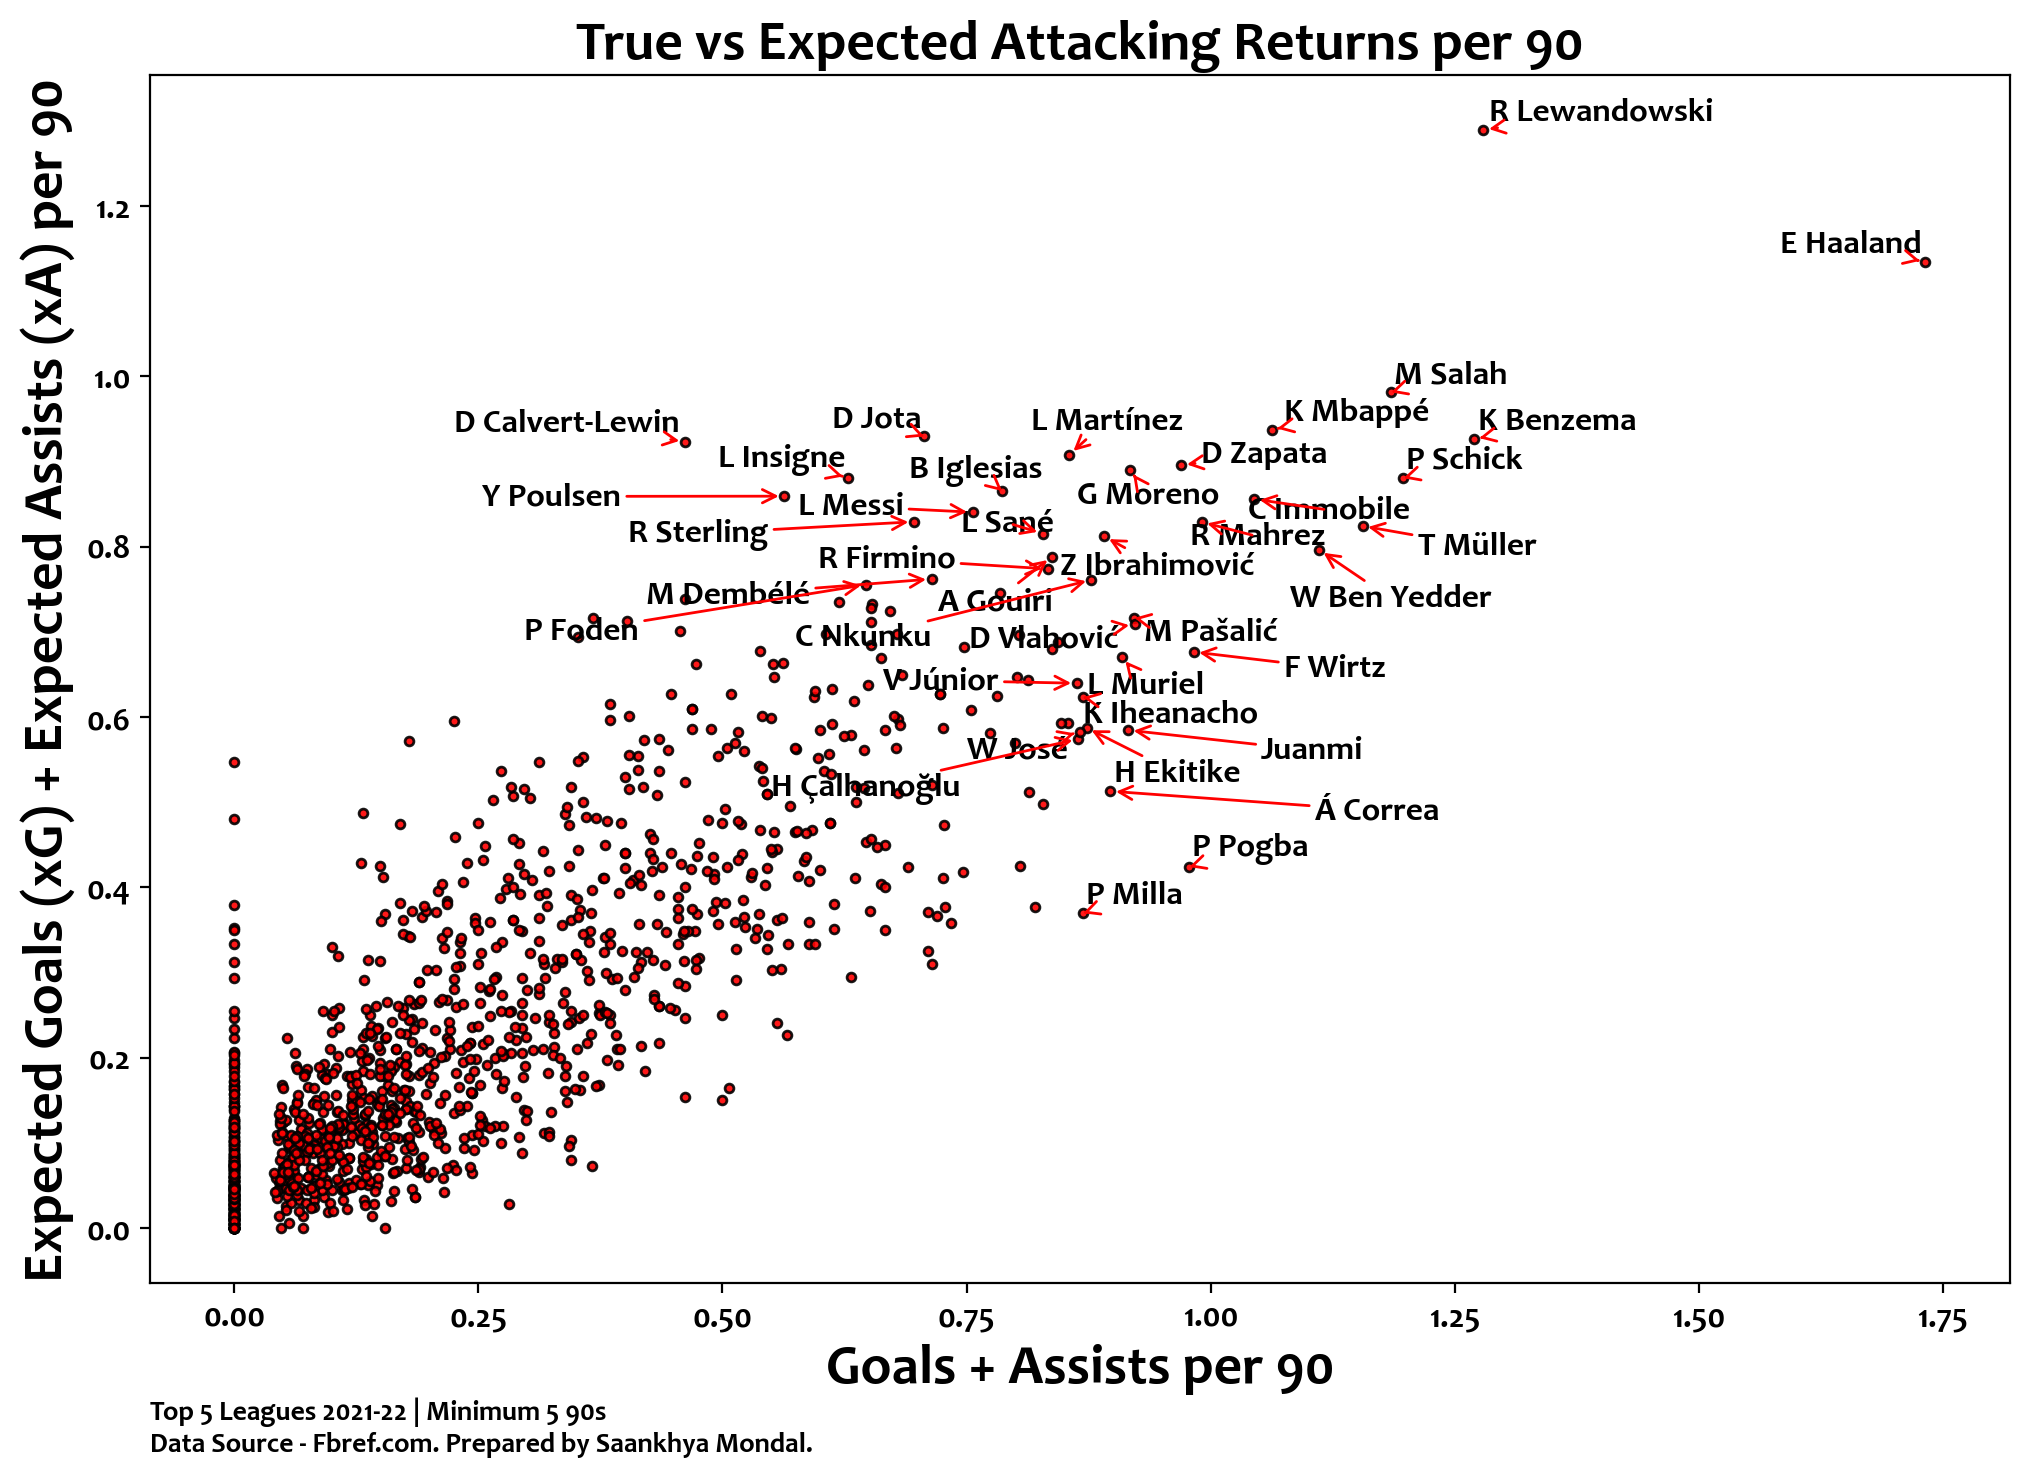

In [14]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data = data[['Player', '90s', 'Gls', 'xG', 'Ast', 'xA']]
data['Gp90'] = data['Gls']/data['90s']
data['Ap90'] = data['Ast']/data['90s']
data['xGp90'] = data['xG']/data['90s']
data['xAp90'] = data['xA']/data['90s']

data['G+Ap90'] = data['Gp90'] + data['Ap90']
data['xG+xAp90'] = data['xGp90'] + data['xAp90']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xG+xAp90'].quantile(0.980)
outlier_bottom = data['xG+xAp90'].quantile(0.01)
outlier_right = data['G+Ap90'].quantile(0.980)
outlier_left = data['G+Ap90'].quantile(0.01)

par_x = list(data['G+Ap90'].astype(float))
par_y = list(data['xG+xAp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goals + Assists per 90', fontsize=20)
ax.set_ylabel('Expected Goals (xG) + Expected Assists (xA) per 90', fontsize=20)
ax.set_title('True vs Expected Attacking Returns per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [15]:
fig.savefig('Images/G+AvsxG+xAp90.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

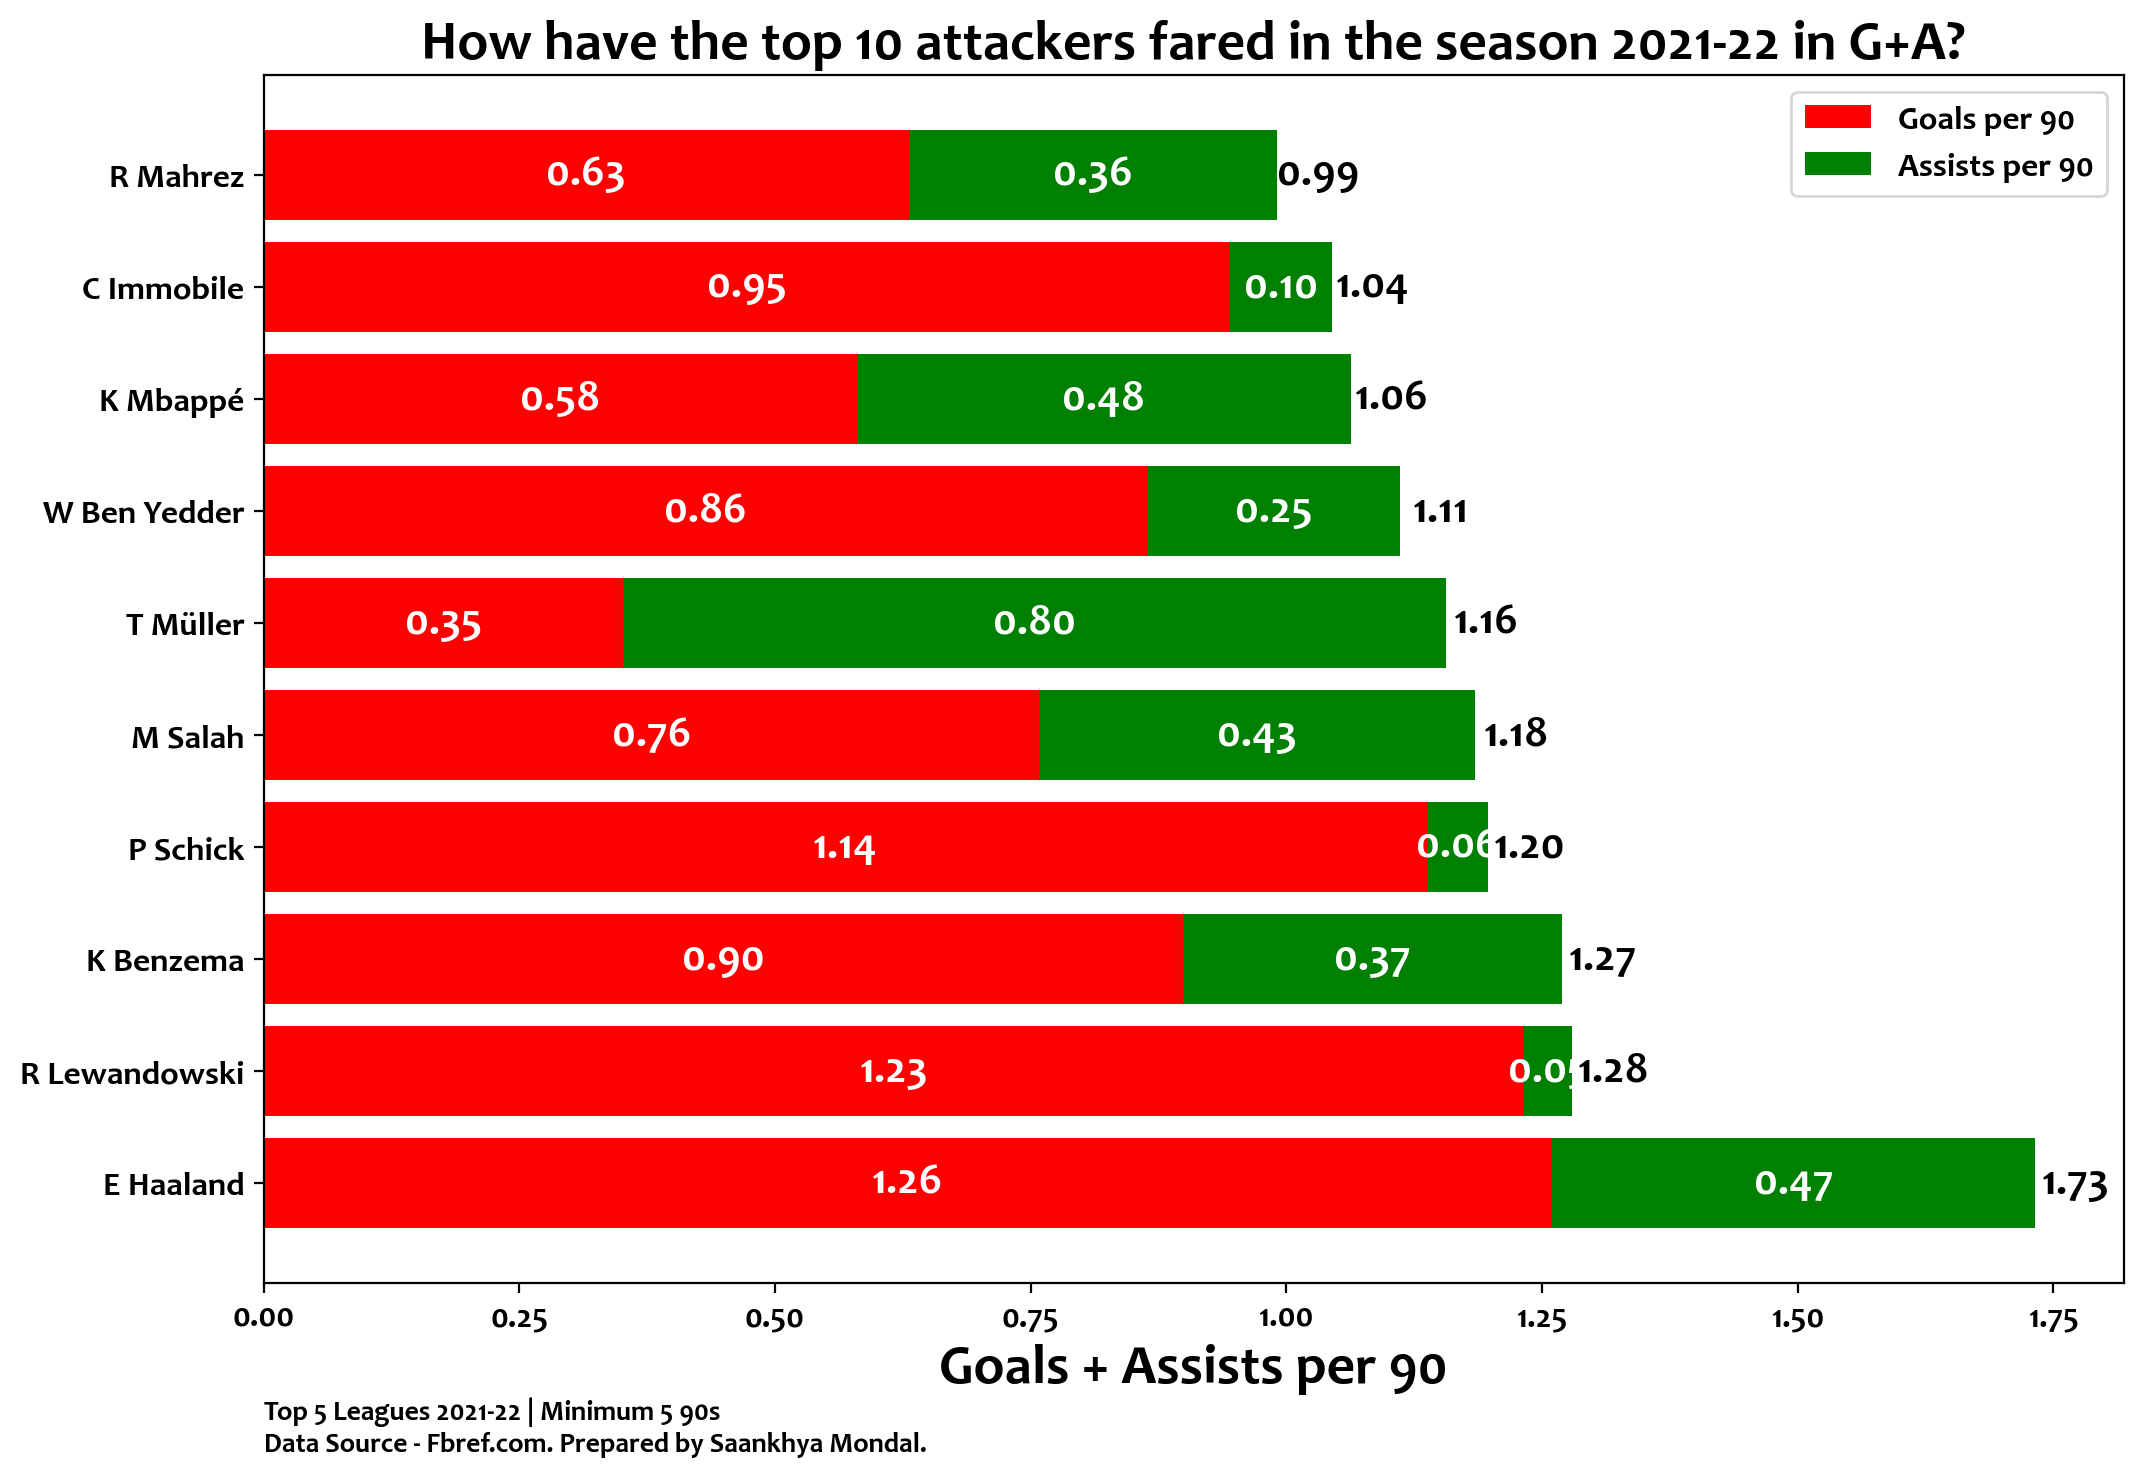

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
d = data.sort_values(by='G+Ap90', ascending=False)
d = d.iloc[:10]
fig.set_dpi(200)
p1 = list(d['Gp90'])
p2 = list(d['Ap90'])
players = list(d['Player'])
color = plt.cm.rainbow(np.linspace(0.9, 1, 10))
for i in range(10):
    players[i] = players[i][0] + ' ' + ' '.join(players[i].split()[1:])
plt.barh(players, p1, color='red')
plt.barh(players, p2, color='green', left=p1)

for p in range(20):
    width, height = ax.patches[p].get_width(), ax.patches[p].get_height()
    x, y = ax.patches[p].get_xy()
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(width),
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=16)
    if p >= 10:
        cc = width + ax.patches[p-10].get_width()
        ax.text(cc + 0.04, 
                y+height/2, 
                '{:.2f}'.format(cc),
                horizontalalignment='center', 
                verticalalignment='center',
                color='black',
                fontsize=16)
plt.legend(['Goals per 90', 'Assists per 90'])
plt.xlabel('Goals + Assists per 90', fontsize=20)
plt.title('How have the top 10 attackers fared in the season 2021-22 in G+A?', fontsize=20)
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [17]:
fig.savefig('Images/G+Ap90_top10.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

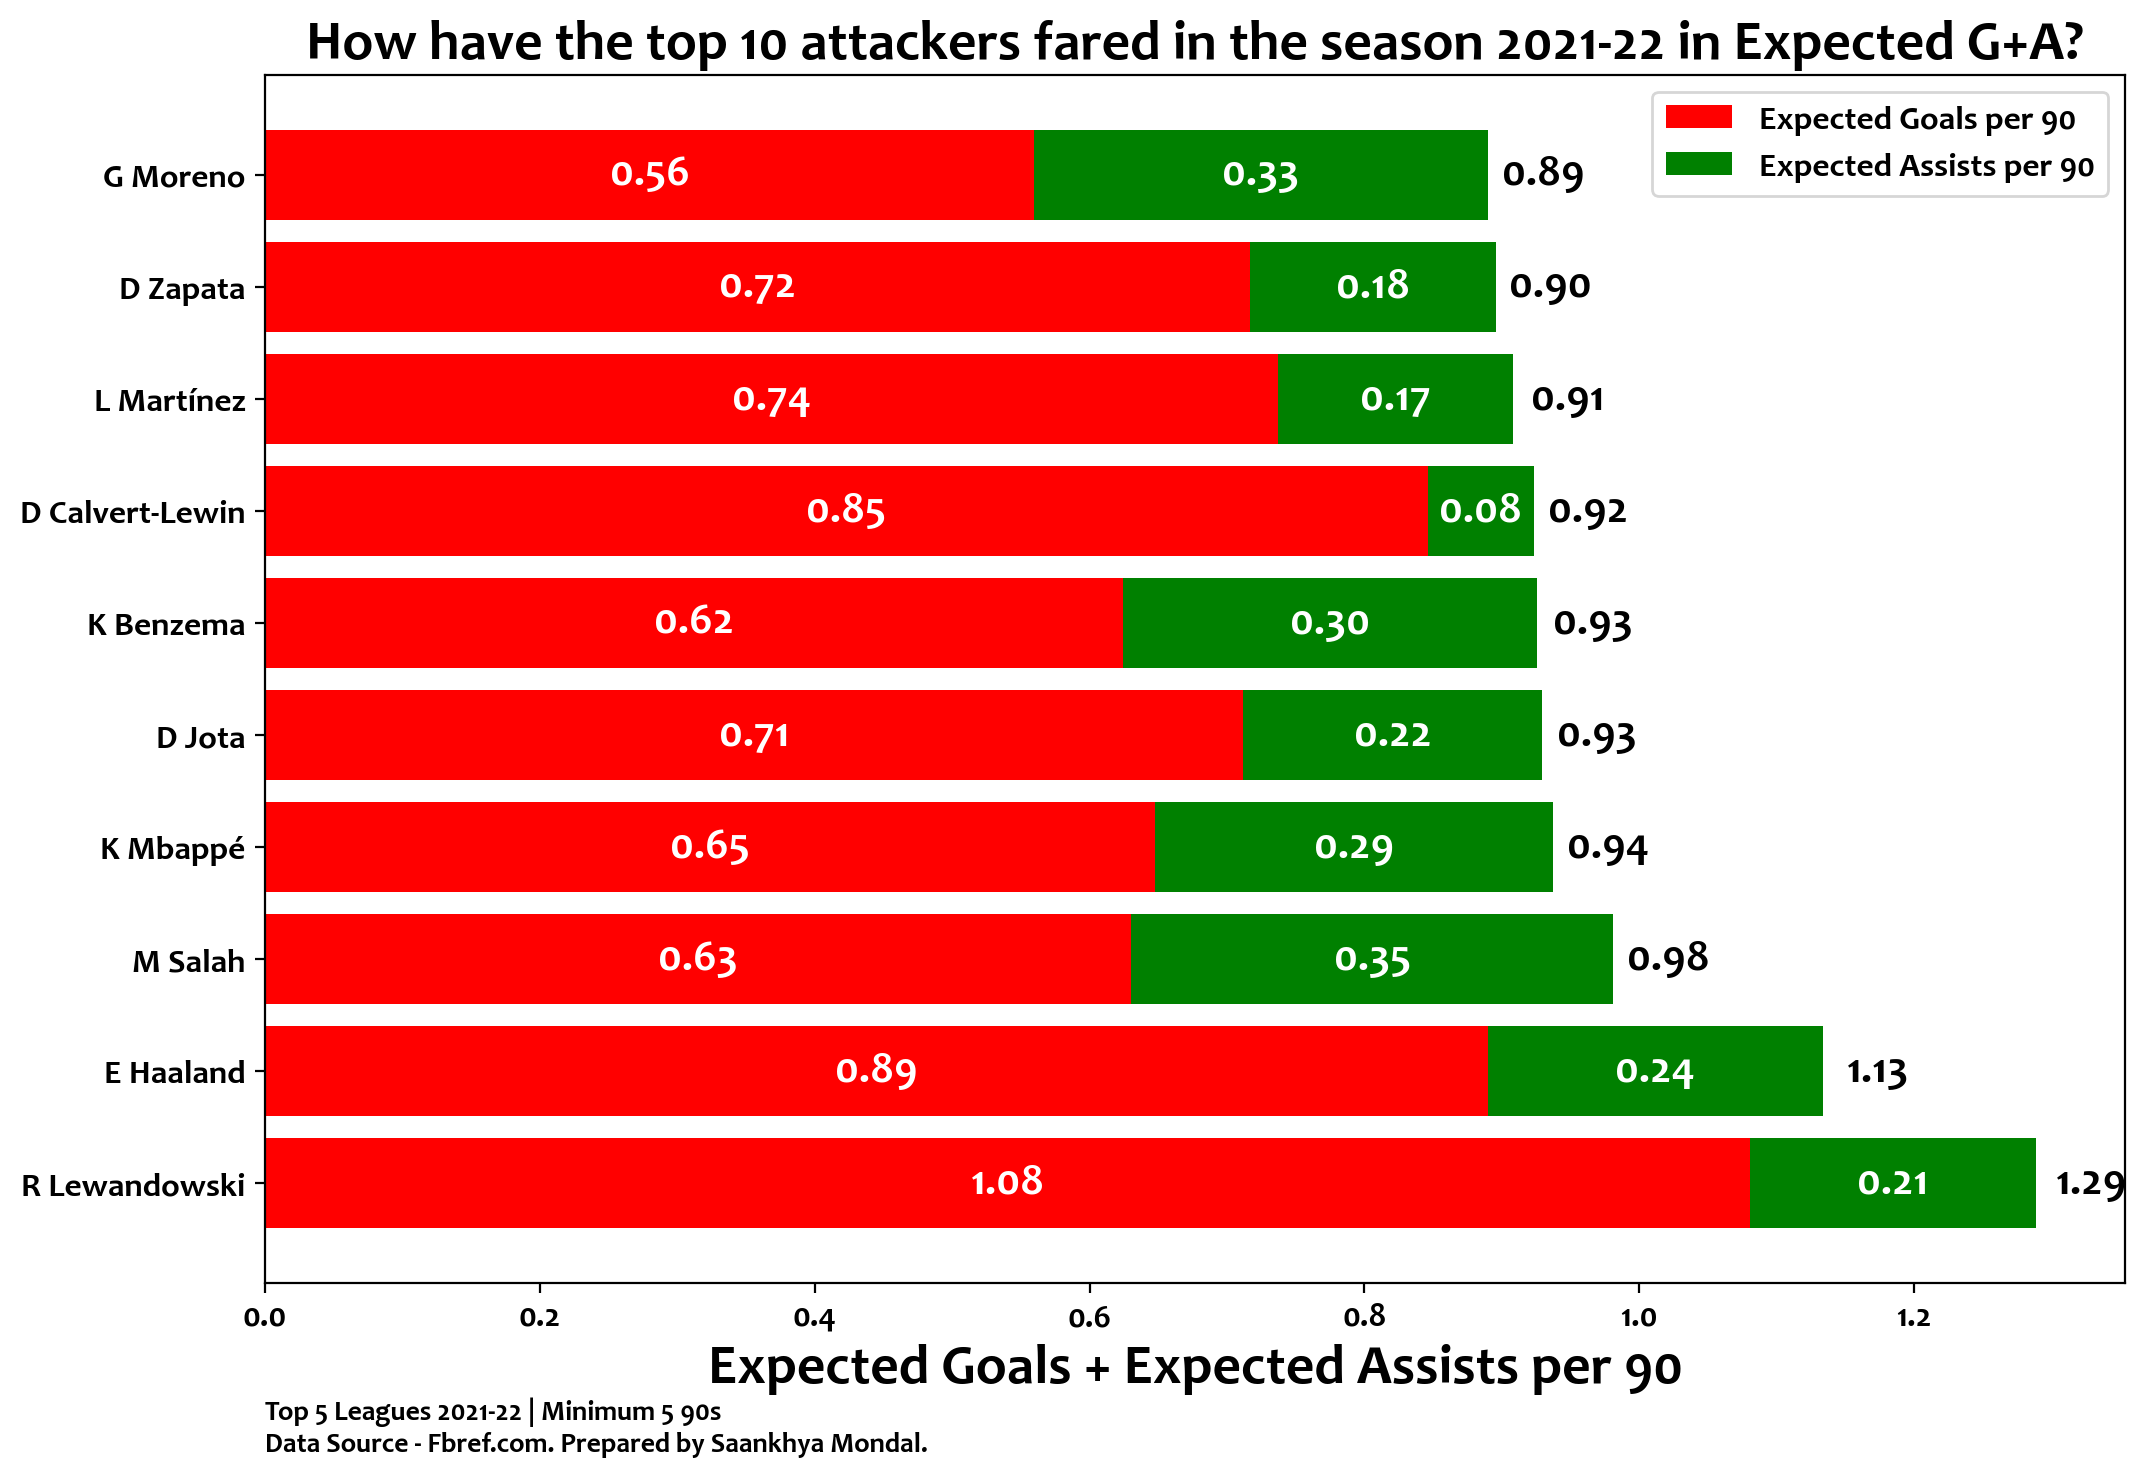

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
d = data.sort_values(by='xG+xAp90', ascending=False)
d = d.iloc[:10]
p1 = list(d['xGp90'])
p2 = list(d['xAp90'])
players = list(d['Player'])
color = plt.cm.rainbow(np.linspace(0.9, 1, 10))
for i in range(10):
    players[i] = players[i][0] + ' ' + ' '.join(players[i].split()[1:])
plt.barh(players, p1, color='red')
plt.barh(players, p2, color='green', left=p1)

for p in range(20):
    width, height = ax.patches[p].get_width(), ax.patches[p].get_height()
    x, y = ax.patches[p].get_xy()
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(width),
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=16)
    if p >= 10:
        cc = width + ax.patches[p-10].get_width()
        ax.text(cc + 0.04, 
                y+height/2, 
                '{:.2f}'.format(cc),
                horizontalalignment='center', 
                verticalalignment='center',
                color='black',
                fontsize=16)
plt.legend(['Expected Goals per 90', 'Expected Assists per 90'])
plt.xlabel('Expected Goals + Expected Assists per 90', fontsize=20)
plt.title('How have the top 10 attackers fared in the season 2021-22 in Expected G+A?', fontsize=20)
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [19]:
fig.savefig('Images/xG+xAp90_top10.png', dpi=400, bbox_inches='tight')

In [20]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1845 entries, 0 to 1845
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      1845 non-null   object
 1   Position    1845 non-null   object
 2   Nation      1845 non-null   object
 3   Pos         1845 non-null   object
 4   Squad       1845 non-null   object
 5   Comp        1845 non-null   object
 6   Age         1845 non-null   object
 7   Born        1845 non-null   object
 8   90s         1845 non-null   object
 9   Gls         1845 non-null   object
 10  Sh_x        1845 non-null   object
 11  SoT         1845 non-null   object
 12  SoT%        1551 non-null   object
 13  Sh/90       1845 non-null   object
 14  SoT/90      1845 non-null   object
 15  G/Sh        1551 non-null   object
 16  G/SoT       1291 non-null   object
 17  Dist        1551 non-null   object
 18  FK          1845 non-null   object
 19  PK          1845 non-null   object
 20  PKatt   